In [13]:
import pandas as pd
import geopandas as gpd
import rasterio

from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
bs_path = ('D:\Berkeley\Research\ExplainableWildfire\datasets\doi_10.6071_M3QX18__v7\burn_severity_CA')

In [3]:
ca_fires = pd.read_csv('D:\Berkeley\Research\ExplainableWildfire\datasets\doi_10.6071_M3QX18__v7\Area_burned_in_each_burn_severity_class_and_emissions_per_fire_1984_2020.csv')

In [4]:
ca_fires.head()

,Event_ID,Fire_Name,Lat,Long,Fire_Year,Fire_Month,Total_area_burned(ha),Unchanged(ha),Low_Severity(ha),Moderate_Severity(ha),...,CH4(kg),NMOC(kg),SO2(kg),NH3(kg),NO(kg),NO2(kg),NOx(kg),PM2.5(kg),OC(kg),BC(kg)
0,CA3268211688619840421,PROCTOR,32.682,-116.886,1984,4,1222.20,0.00,300.96,691.38,...,122498.892,1334643.84,40974.4476,93153.2148,72501.624,52617.2868,116967.780,439157.412,205992.036,72591.8796
1,CA3341311687319840530,AGUANGA,33.413,-116.873,1984,5,2250.81,0.54,719.28,1209.42,...,270244.296,2652322.32,84675.1509,176318.4834,136579.959,104980.0932,215969.733,921608.307,551366.541,128230.0443
2,CA3375011772919840615,LOMA RIDGE,33.750,-117.729,1984,6,559.26,5.58,268.83,267.03,...,44565.093,476699.76,14949.4482,32872.9653,25819.893,19010.9259,41448.456,158066.550,77518.152,25344.1260
3,CA3428511755419840528,LYTLE,34.285,-117.554,1984,5,988.47,20.79,134.19,446.58,...,243621.297,1726734.24,64527.7401,91820.5767,70816.158,70530.9435,99933.183,721917.063,715550.607,42452.7525
4,CA3444311889619841015,SQUAW FLAT,34.443,-118.896,1984,10,2447.64,19.80,1748.97,607.32,...,297284.805,2563898.40,90086.0247,156232.3275,124645.644,105702.7491,189641.601,951805.737,717583.221,100634.9715


In [5]:
ca_fires.describe()

,Lat,Long,Fire_Year,Fire_Month,Total_area_burned(ha),Unchanged(ha),Low_Severity(ha),Moderate_Severity(ha),High_Severity(ha),Grass_Burned(ha),...,CH4(kg),NMOC(kg),SO2(kg),NH3(kg),NO(kg),NO2(kg),NOx(kg),PM2.5(kg),OC(kg),BC(kg)
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,...,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03
mean,37.131404,-119.977961,2002.464938,7.467885,5065.643371,62.250460,1630.848103,2056.007201,1255.755097,60.782510,...,7.978777e+05,5.733593e+06,2.224699e+05,3.026778e+05,2.449277e+05,2.430755e+05,3.461232e+05,2.365055e+06,2.301592e+06,1.432372e+05
std,2.734908,2.110101,10.787182,1.621004,16243.321638,564.959068,4759.476256,6061.968525,6090.405382,317.153124,...,3.497929e+06,2.402248e+07,9.201127e+05,1.239942e+06,9.639686e+05,9.917479e+05,1.338486e+06,1.022729e+07,1.053615e+07,5.370962e+05
min,32.577000,-124.163000,1984.000000,1.000000,6.660000,0.000000,0.000000,0.090000,0.000000,0.000000,...,1.670400e+01,1.612800e+02,1.728000e+01,3.225600e+00,1.670400e+01,1.785600e+01,2.246400e+01,4.147200e+01,1.497600e+01,2.131200e+00
25%,34.586000,-121.486000,1994.000000,6.000000,647.010000,0.270000,172.530000,283.950000,18.270000,0.000000,...,5.223236e+04,4.826218e+05,1.856006e+04,2.734201e+04,2.523441e+04,2.181322e+04,3.763814e+04,1.675234e+05,1.044145e+05,1.439710e+04
50%,36.846000,-120.037000,2003.000000,7.000000,1212.210000,3.240000,419.040000,552.960000,130.950000,1.620000,...,1.365187e+05,1.103383e+06,4.316268e+04,5.984654e+04,5.042641e+04,4.838980e+04,7.184595e+04,4.256581e+05,3.550796e+05,3.194804e+04
75%,39.725000,-118.436000,2012.000000,8.000000,3262.410000,20.250000,1079.550000,1478.250000,541.710000,20.430000,...,4.280766e+05,3.291278e+06,1.267442e+05,1.785509e+05,1.459313e+05,1.401907e+05,2.081504e+05,1.292868e+06,1.149703e+06,8.856906e+04
max,42.441000,-114.458000,2020.000000,12.000000,417701.160000,22045.230000,103830.390000,135594.720000,170053.650000,7801.830000,...,1.036744e+08,7.036522e+08,2.699994e+07,3.586769e+07,2.774752e+07,2.897257e+07,3.815451e+07,3.019895e+08,3.146038e+08,1.459138e+07


In [6]:
ca_fires.columns

Index(['Event_ID', 'Fire_Name', 'Lat', 'Long', 'Fire_Year', 'Fire_Month',
       'Total_area_burned(ha)', 'Unchanged(ha)', 'Low_Severity(ha)',
       'Moderate_Severity(ha)', 'High_Severity(ha)', 'Grass_Burned(ha)',
       'CO2(kg)', 'CO(kg)', 'CH4(kg)', 'NMOC(kg)', 'SO2(kg)', 'NH3(kg)',
       'NO(kg)', 'NO2(kg)', 'NOx(kg)', 'PM2.5(kg)', 'OC(kg)', 'BC(kg)'],
      dtype='object')

In [7]:
ca_fires['% of Fire at High Severity'] = ca_fires['High_Severity(ha)']/ca_fires['Total_area_burned(ha)']

In [33]:
fig = px.scatter(ca_fires, x='Fire_Year', y='% of Fire at High Severity', size_max=60,
                    size='Total_area_burned(ha)', color='CO2(kg)')

fig.show()

### Distribution of Area

In [22]:
ca_fires.columns

Index(['Event_ID', 'Fire_Name', 'Lat', 'Long', 'Fire_Year', 'Fire_Month',
       'Total_area_burned(ha)', 'Unchanged(ha)', 'Low_Severity(ha)',
       'Moderate_Severity(ha)', 'High_Severity(ha)', 'Grass_Burned(ha)',
       'CO2(kg)', 'CO(kg)', 'CH4(kg)', 'NMOC(kg)', 'SO2(kg)', 'NH3(kg)',
       'NO(kg)', 'NO2(kg)', 'NOx(kg)', 'PM2.5(kg)', 'OC(kg)', 'BC(kg)',
       '% of Fire at High Severity'],
      dtype='object')

(0.0, 4000.0)

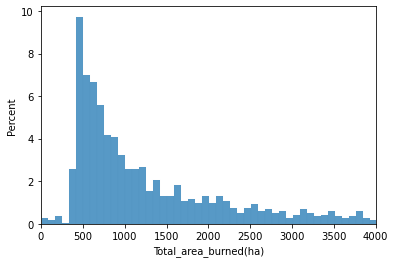

In [20]:
sns.histplot(ca_fires['Total_area_burned(ha)'], stat='percent', bins=5000)
plt.xlim(0,4000)


Fire_Year
1984    AxesSubplot(0.125,0.125;0.775x0.755)
1985    AxesSubplot(0.125,0.125;0.775x0.755)
1986    AxesSubplot(0.125,0.125;0.775x0.755)
1987    AxesSubplot(0.125,0.125;0.775x0.755)
1988    AxesSubplot(0.125,0.125;0.775x0.755)
1989    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
1991    AxesSubplot(0.125,0.125;0.775x0.755)
1992    AxesSubplot(0.125,0.125;0.775x0.755)
1993    AxesSubplot(0.125,0.125;0.775x0.755)
1994    AxesSubplot(0.125,0.125;0.775x0.755)
1995    AxesSubplot(0.125,0.125;0.775x0.755)
1996    AxesSubplot(0.125,0.125;0.775x0.755)
1997    AxesSubplot(0.125,0.125;0.775x0.755)
1998    AxesSubplot(0.125,0.125;0.775x0.755)
1999    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2001    AxesSubplot(0.125,0.125;0.775x0.755)
2002    AxesSubplot(0.125,0.125;0.775x0.755)
2003    AxesSubplot(0.125,0.125;0.775x0.755)
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)


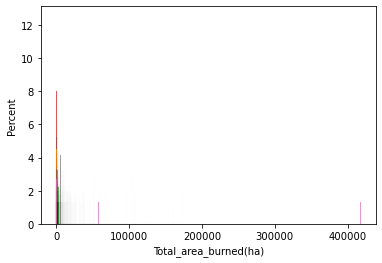

In [32]:
ca_fires.groupby('Fire_Year').apply(lambda x : sns.histplot(x['Total_area_burned(ha)'], stat='percent', bins=5000))

In [29]:
ca_fires.columns

Index(['Event_ID', 'Fire_Name', 'Lat', 'Long', 'Fire_Year', 'Fire_Month',
       'Total_area_burned(ha)', 'Unchanged(ha)', 'Low_Severity(ha)',
       'Moderate_Severity(ha)', 'High_Severity(ha)', 'Grass_Burned(ha)',
       'CO2(kg)', 'CO(kg)', 'CH4(kg)', 'NMOC(kg)', 'SO2(kg)', 'NH3(kg)',
       'NO(kg)', 'NO2(kg)', 'NOx(kg)', 'PM2.5(kg)', 'OC(kg)', 'BC(kg)',
       '% of Fire at High Severity'],
      dtype='object')